In [1]:
import re
import unicodedata
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import acquire as a
import prepare as p
from env import user, password, host

In [2]:
def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [4]:
#p.prep_article_data(df, 'text')

In [5]:
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [9]:
ham_words = ' '.join(ham_words)

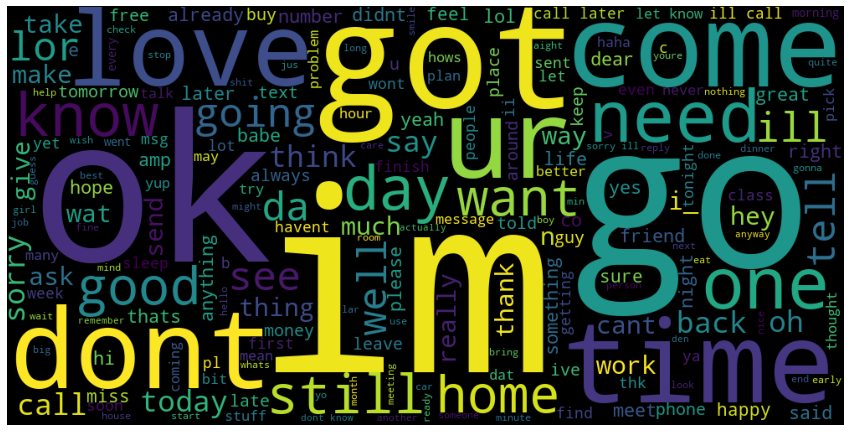

In [10]:
wordcloud = WordCloud(width = 1000, height = 500).generate(ham_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [11]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words.split(), 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams.head(20)

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(ok, lor)          22
(pls, send)        22
(im, gonna)        20
(good, night)      19
(happy, new)       19
(wat, time)        18
(last, night)      18
(hi, hi)           18
(great, day)       17
(dont, want)       15
(want, go)         15
dtype: int64

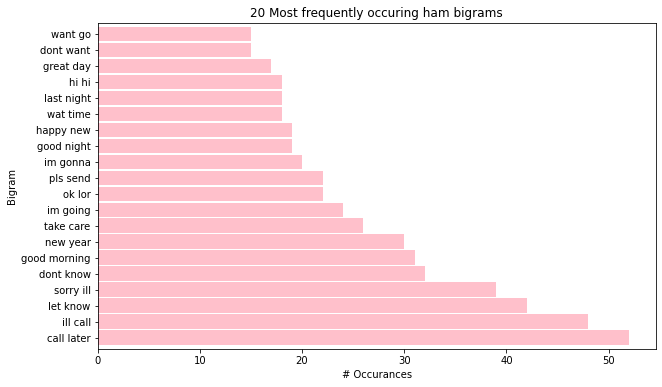

In [12]:
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

## Working with spam

In [13]:
spam_words = ' '.join(spam_words)

In [14]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words.split(), 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams.head(20)

(please, call)          44
(customer, service)     27
(po, box)               24
(a1000, cash)           23
(guaranteed, call)      23
(prize, guaranteed)     22
(send, stop)            19
(selected, receive)     19
(await, collection)     19
(every, week)           19
(chance, win)           19
(urgent, mobile)        18
(land, line)            18
(valid, 12hrs)          17
(claim, call)           17
(sae, tc)               16
(account, statement)    16
(call, 08000930705)     16
(prize, claim)          16
(ur, mob)               15
dtype: int64

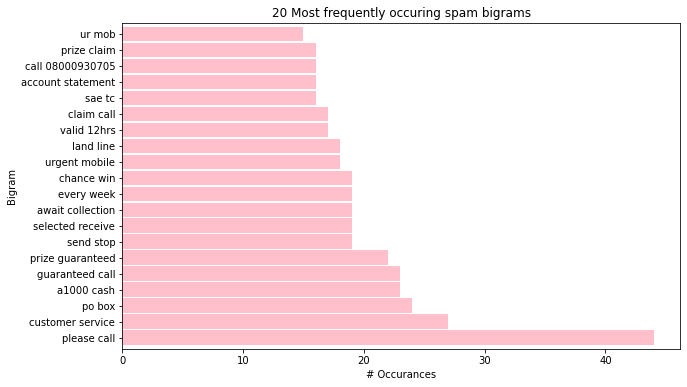

In [15]:
top_20_spam_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_spam_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

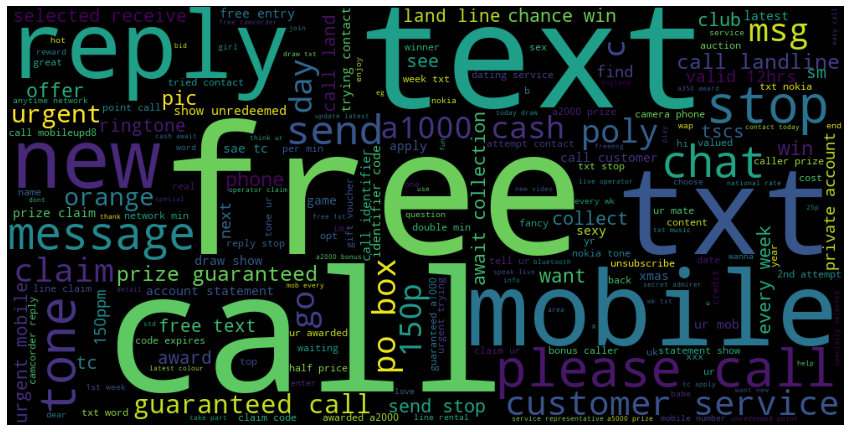

In [16]:
wordcloud = WordCloud(width = 1000, height = 500).generate(spam_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [17]:
pd.Series(spam_words.split()).value_counts().head(20)

call       359
free       216
txt        150
ur         144
text       137
mobile     135
4          119
claim      115
stop       113
reply      102
prize       94
get         83
tone        73
service     72
new         69
send        67
nokia       65
urgent      63
week        62
cash        62
dtype: int64

## Trigrams

### spam

In [21]:
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words.split(), 3))
                      .value_counts()
                      .head(20))

top_20_spam_trigrams.head()

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(private, 2003, account)      13
dtype: int64

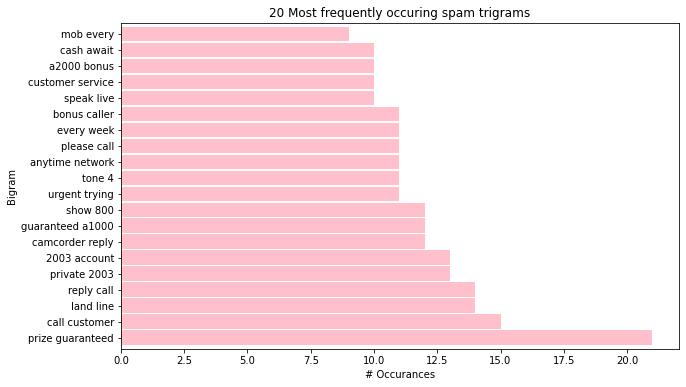

In [19]:
top_20_spam_trigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam trigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_spam_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

### ham

In [22]:
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words.split(), 3))
                      .value_counts()
                      .head(20))

top_20_ham_trigrams.head()

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(cant, pick, phone)     12
dtype: int64

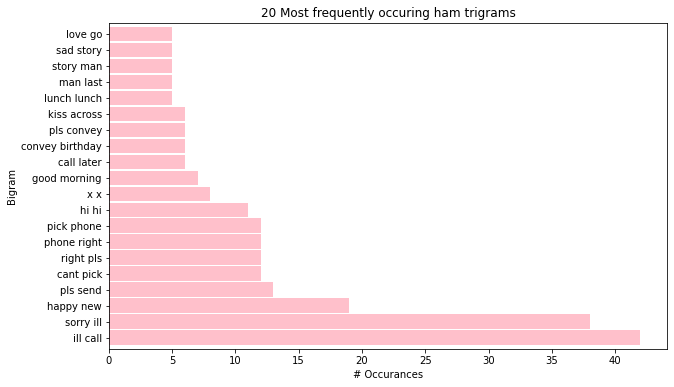

In [23]:
top_20_ham_trigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham trigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

## Working with blog articles

In [26]:
blogs = a.get_blog_articles()

In [70]:
blogs = p.prep_article_data(blogs, 'content', extra_words = ['Codeup', 'codeup'])

Removed 210 stopwords
---
Removed 199 stopwords
---
Removed 138 stopwords
---
Removed 161 stopwords
---
Removed 23 stopwords
---
Removed 88 stopwords
---


In [71]:
blogs

,title,content,clean,stemmed,lemmatized
0,Become a Data Scientist in 6 Months!,Are you feeling unfulfilled in your work but w...,feeling unfulfilled work want avoid returning ...,feel unfulfil work want avoid return tradit ed...,feeling unfulfilled work want avoid returning ...
1,Hiring Tech Talent Around the Holidays,Are you a hiring manager having trouble fillin...,hiring manager trouble filling position around...,hire manag troubl fill posit around holiday so...,hiring manager trouble filling position around...
2,Cloud Administration Program New Funding Options,Finding resources to fund your educational goa...,finding resources fund educational goals possi...,find resourc fund educ goal possibl largest ob...,finding resource fund educational goal possibl...
3,Why Dallas is a Great Location for IT Professi...,"When breaking into a new career, it is importa...",breaking new career important explore job oppo...,break new career import explor job opportun ex...,breaking new career important explore job oppo...
4,Codeup is ranked #1 Best in DFW 2022,We are excited to announce that Codeup ranked ...,excited announce ranked 1 best tradetechnical ...,excit announc rank 1 best tradetechn school df...,excited announce ranked 1 best tradetechnical ...
5,Codeup’s Scholarship Offerings,In honor of November being National Scholarshi...,honor november national scholarship month wed ...,honor novemb nation scholarship month wed like...,honor november national scholarship month wed ...


In [72]:
all_blogs = ' '.join(blogs['clean'])

In [73]:
all_blogs

'feeling unfulfilled work want avoid returning traditional educational route help starting professional daunting always ideal help go career bored job excites 6 months heres data science program 20week program opportunity take career new heights data science one needed jobs tech youll gather data clean explore trends apply machine learning models make predictions upon completing program know turn insights actionable recommendations youll huge asset company technical skills become data scientist projects upon projects experience belt common reason individuals opt change careers fear late crafted program guide career transition prove jumpstart new job age experience level decide attend get support system first admissions team guide getting started well assist getting financial aid squared away program begins industry experts instructors help reach full potential complete program successfully next student experience team ready assist navigating program lifes obstacles may arise finally pl

In [74]:
pd.Series(blogs['clean'][0].split()).value_counts().head(20)

program        8
career         6
data           5
youll          4
job            4
help           4
experience     3
give           3
team           3
science        3
well           3
completing     2
upon           2
workshops      2
projects       2
information    2
admissions     2
100            2
accredited     2
land           2
dtype: int64

In [75]:
pd.Series(all_blogs.split()).value_counts().head(20)

tech           25
career         21
program        17
scholarship    16
job            13
give           13
well           12
new            10
accredited     10
dallas         10
states         10
youll           9
programs        9
information     8
middle          8
first           8
data            8
bootcamp        8
schools         8
workshops       8
dtype: int64

In [76]:
top_20_all_blogs_bigrams = (pd.Series(nltk.ngrams(all_blogs.split(), 2))
                      .value_counts()
                      .head(20))

top_20_all_blogs_bigrams.head(20)

(middle, states)               8
(scholarship, scholarship)     7
(career, tech)                 7
(gi, bill)                     5
(get, started)                 5
(financial, aid)               5
(bootcamp, texas)              5
(youll, learn)                 5
(scholarship, open)            5
(data, science)                5
(technology, programs)         4
(programs, middle)             4
(nondegree, granting)          4
(career, technology)           4
(granting, career)             4
(commission, secondary)        4
(postsecondary, nondegree)     4
(accredited, postsecondary)    4
(states, commission)           4
(open, anyone)                 4
dtype: int64

In [77]:
top_20_blog0_bigrams = (pd.Series(nltk.ngrams(blogs['clean'][0].split(), 2))
                      .value_counts()
                      .head(20))

top_20_blog0_bigrams.head(20)

(data, science)           3
(middle, states)          2
(financial, aid)          2
(completing, program)     2
(feeling, unfulfilled)    1
(land, land)              1
(land, job)               1
(job, within)             1
(within, six)             1
(six, months)             1
(months, completing)      1
(program, refund)         1
(refund, 100)             1
(100, paid)               1
(paid, tuition)           1
(tuition, arent)          1
(arent, sure)             1
(work, hard)              1
(sure, career)            1
(career, data)            1
dtype: int64

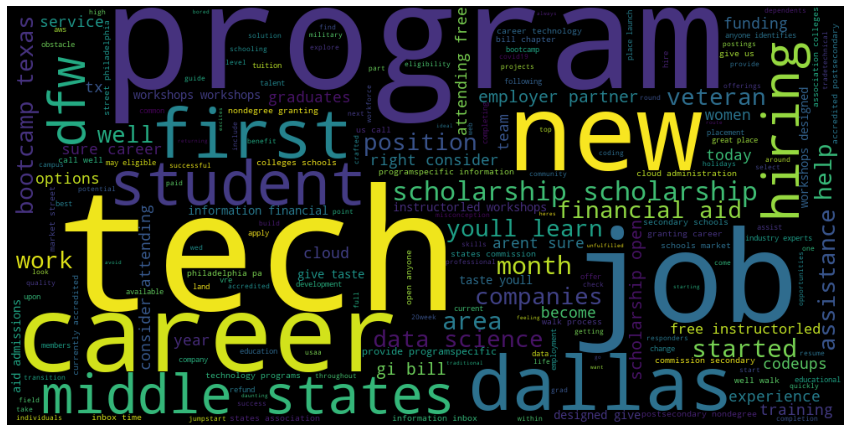

In [78]:
wordcloud = WordCloud(width = 1000, height = 500).generate(all_blogs)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

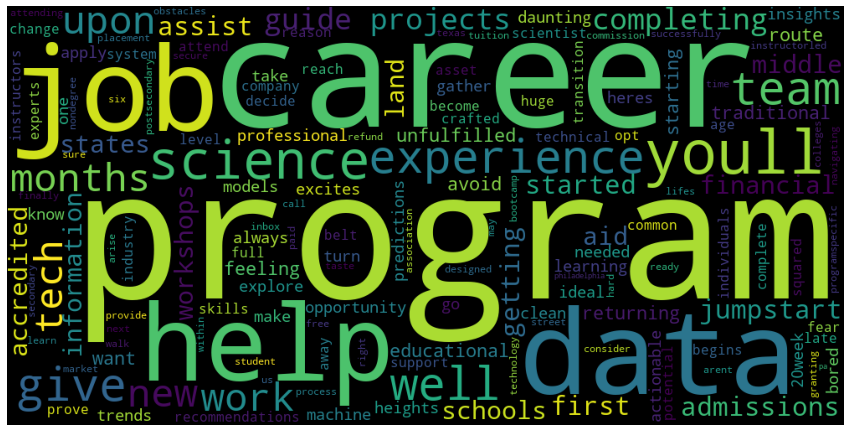

In [79]:
wordcloud = WordCloud(width = 1000, height = 500).generate(blogs['clean'][0])
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()